# Welcome to the first xarray homework assignment.
For this assignment you'll learn some of the basics of using xarray on a real dataset. 

In [2]:
import os
import xarray as xr
import numpy as np
import matplotlib.pyplot as plt
from urllib.request import urlretrieve


# Step 0. 
For this assignment we'll be working with some
GridMET data. More information about it can be 
found here: https://www.climatologylab.org/gridmet.html

To get started, we'll need to download some data.
The data is split into separate files for each variable
and year. Set the year to 2020, and create a list
for variables which contains "pet", "srad", and "vpd".
We'll see what those are later.

Next, write a for loop which iterates over the
`variables_to_download`, and calls the supplied 
function # `download_gridmet_variable` given the 
variable name # and year to download. In your for 
loop, make sure to "append" the name of the 
downloaded file to the `downloaded_files` list.


In [3]:
def download_gridmet_variable(variable, year):
    base_url = 'https://www.northwestknowledge.net/metdata/data'
    filename = f'{variable}_{year}.nc'
    # Only download if the file doesn't exist
    if not os.path.exists(filename):
        print(f'Downloading {variable} for {year}...')
        urlretrieve(f'{base_url}/{filename}', filename)
    return filename

downloaded_files = []

#TODO: Your code here
year = '2020'
variables_to_download = ['pet', 'srad','vpd']

for var in variables_to_download:
    file = download_gridmet_variable(var, year)
    downloaded_files.append(file)

print('Done downloading data!')
print(downloaded_files)


Done downloading data!
['pet_2020.nc', 'srad_2020.nc', 'vpd_2020.nc']


# Step 1:
Use the `xr.open_mfdataset` function to open
all of the files that were just downloaded.
`mfdataset` is an abbreviation of "multi file
dataset", which means you can pass it the list
of downloaded files directly and xarray will 
figure out the rest. Once you've got it open
just display the result and look around at
what's in the data.


In [4]:
# TODO: Your code here
ds = xr.open_mfdataset(downloaded_files)
ds


<xarray.Dataset> Size: 7GB
Dimensions:                                    (day: 366, lat: 585, lon: 1386,
                                                crs: 1)
Coordinates:
  * lon                                        (lon) float64 11kB -124.8 ... ...
  * lat                                        (lat) float64 5kB 49.4 ... 25.07
  * day                                        (day) datetime64[ns] 3kB 2020-...
  * crs                                        (crs) uint16 2B 3
Data variables:
    potential_evapotranspiration               (day, lat, lon) float64 2GB dask.array<chunksize=(61, 98, 231), meta=np.ndarray>
    surface_downwelling_shortwave_flux_in_air  (day, lat, lon) float64 2GB dask.array<chunksize=(61, 98, 231), meta=np.ndarray>
    mean_vapor_pressure_deficit                (day, lat, lon) float64 2GB dask.array<chunksize=(61, 98, 231), meta=np.ndarray>
Attributes: (12/19)
    geospatial_bounds_crs:      EPSG:4326
    Conventions:                CF-1.6
    geospatial_bounds:          POLYGON((-124.7666666333333 49.40000000000000...
    geospatial_lat_min:         25.066666666666666
    geospatial_lat_max:         49.40000000000000
    geospatial_lon_min:         -124.7666666333333
    ...                         ...
    date:                       04 May 2021
    note1:                      The projection information for this file is: ...
    note2:                      Citation: Abatzoglou, J.T., 2013, Development...
    note3:                      Data in slices after last_permanent_slice (1-...
    note4:                      Data in slices after last_provisional_slice (...
    note5:                      Days correspond approximately to calendar day...

# Step 2:
Note there is a "CRS" coordinate in the 
dataset, but none of the variables rely
on it. For the sake of cleaning things
up, go ahead and "drop" it from the
dataset.


In [5]:
#TODO: Your code here
ds = ds.drop_vars('crs')    
ds

<xarray.Dataset> Size: 7GB
Dimensions:                                    (day: 366, lat: 585, lon: 1386)
Coordinates:
  * lon                                        (lon) float64 11kB -124.8 ... ...
  * lat                                        (lat) float64 5kB 49.4 ... 25.07
  * day                                        (day) datetime64[ns] 3kB 2020-...
Data variables:
    potential_evapotranspiration               (day, lat, lon) float64 2GB dask.array<chunksize=(61, 98, 231), meta=np.ndarray>
    surface_downwelling_shortwave_flux_in_air  (day, lat, lon) float64 2GB dask.array<chunksize=(61, 98, 231), meta=np.ndarray>
    mean_vapor_pressure_deficit                (day, lat, lon) float64 2GB dask.array<chunksize=(61, 98, 231), meta=np.ndarray>
Attributes: (12/19)
    geospatial_bounds_crs:      EPSG:4326
    Conventions:                CF-1.6
    geospatial_bounds:          POLYGON((-124.7666666333333 49.40000000000000...
    geospatial_lat_min:         25.066666666666666
    geospatial_lat_max:         49.40000000000000
    geospatial_lon_min:         -124.7666666333333
    ...                         ...
    date:                       04 May 2021
    note1:                      The projection information for this file is: ...
    note2:                      Citation: Abatzoglou, J.T., 2013, Development...
    note3:                      Data in slices after last_permanent_slice (1-...
    note4:                      Data in slices after last_provisional_slice (...
    note5:                      Days correspond approximately to calendar day...

# Step 3:
Before getting to far into working with the
data, let's first look at where it came from.
To do this, pull out the attributes into an 
`attrs` variable. Then, pull out who the "author"
of the dataset is and print that out.


In [6]:

# TODO: Your code here
attrs = ds.attrs
author = attrs.get('author')
print(author)


John Abatzoglou - University of Idaho, jabatzoglou@uidaho.edu


# Step 4:
You should also generally familiarize yourself
with the actual data variables before trying to
do any analysis with a dataset, so let's look at
that as well.
To do so, look at each variable's "description"
and "units" in the variables attributes. 
Print them out below.


In [7]:

#TODO: Your code here
for var in ds:
    description = ds[var].attrs.get('description')
    units = ds[var].attrs.get('units')  
    print(description, units)



Daily reference evapotranspiration (short grass) mm
Daily Mean downward shortwave radiation at surface W m-2
mean vapor presure deficit kPa


# Step 5:
Just select out the first `day` of the data
and assign it to the `first_ds` variable


In [8]:
# TODO: Your code here
first_ds = ds.isel(day=0)
first_ds 

<xarray.Dataset> Size: 19MB
Dimensions:                                    (lat: 585, lon: 1386)
Coordinates:
  * lon                                        (lon) float64 11kB -124.8 ... ...
  * lat                                        (lat) float64 5kB 49.4 ... 25.07
    day                                        datetime64[ns] 8B 2020-01-01
Data variables:
    potential_evapotranspiration               (lat, lon) float64 6MB dask.array<chunksize=(98, 231), meta=np.ndarray>
    surface_downwelling_shortwave_flux_in_air  (lat, lon) float64 6MB dask.array<chunksize=(98, 231), meta=np.ndarray>
    mean_vapor_pressure_deficit                (lat, lon) float64 6MB dask.array<chunksize=(98, 231), meta=np.ndarray>
Attributes: (12/19)
    geospatial_bounds_crs:      EPSG:4326
    Conventions:                CF-1.6
    geospatial_bounds:          POLYGON((-124.7666666333333 49.40000000000000...
    geospatial_lat_min:         25.066666666666666
    geospatial_lat_max:         49.40000000000000
    geospatial_lon_min:         -124.7666666333333
    ...                         ...
    date:                       04 May 2021
    note1:                      The projection information for this file is: ...
    note2:                      Citation: Abatzoglou, J.T., 2013, Development...
    note3:                      Data in slices after last_permanent_slice (1-...
    note4:                      Data in slices after last_provisional_slice (...
    note5:                      Days correspond approximately to calendar day...

# Step 6:
Now that you've got a single timestep out
make a spatial plot of the variable 
"mean_vapor_pressure_deficit".


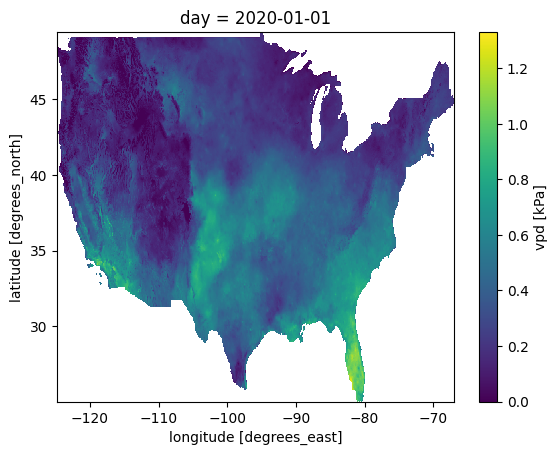

/workspaces/homework_marlanahinkley/.venv/lib/python3.11/site-packages/dask/array/numpy_compat.py:57: RuntimeWarning: invalid value encountered in divide
  x = np.divide(x1, x2, out)
/workspaces/homework_marlanahinkley/.venv/lib/python3.11/site-packages/dask/array/numpy_compat.py:57: RuntimeWarning: invalid value encountered in divide
  x = np.divide(x1, x2, out)
/workspaces/homework_marlanahinkley/.venv/lib/python3.11/site-packages/dask/array/numpy_compat.py:57: RuntimeWarning: invalid value encountered in divide
  x = np.divide(x1, x2, out)


In [ ]:
#TODO: Your code here
first_ds['mean_vapor_pressure_deficit'].plot()


# Step 7:
Similarly, make a spatial plot of the variable
"potential_evapotranspiration".


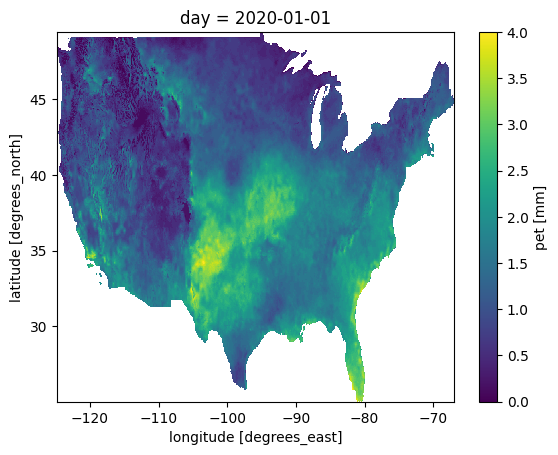

In [10]:
#TODO: Your code here
first_ds['potential_evapotranspiration'].plot()

# Step 8:
Select the first 30 entries of latitude 
and 20th to 40th entries of longitude
from the full `ds`


In [11]:
#TODO: Your code here
subset_ds = ds.isel(lat=slice(0,30), lon=slice(20,40)) 
subset_ds

<xarray.Dataset> Size: 5MB
Dimensions:                                    (day: 366, lat: 30, lon: 20)
Coordinates:
  * lon                                        (lon) float64 160B -123.9 ... ...
  * lat                                        (lat) float64 240B 49.4 ... 48.19
  * day                                        (day) datetime64[ns] 3kB 2020-...
Data variables:
    potential_evapotranspiration               (day, lat, lon) float64 2MB dask.array<chunksize=(61, 30, 20), meta=np.ndarray>
    surface_downwelling_shortwave_flux_in_air  (day, lat, lon) float64 2MB dask.array<chunksize=(61, 30, 20), meta=np.ndarray>
    mean_vapor_pressure_deficit                (day, lat, lon) float64 2MB dask.array<chunksize=(61, 30, 20), meta=np.ndarray>
Attributes: (12/19)
    geospatial_bounds_crs:      EPSG:4326
    Conventions:                CF-1.6
    geospatial_bounds:          POLYGON((-124.7666666333333 49.40000000000000...
    geospatial_lat_min:         25.066666666666666
    geospatial_lat_max:         49.40000000000000
    geospatial_lon_min:         -124.7666666333333
    ...                         ...
    date:                       04 May 2021
    note1:                      The projection information for this file is: ...
    note2:                      Citation: Abatzoglou, J.T., 2013, Development...
    note3:                      Data in slices after last_permanent_slice (1-...
    note4:                      Data in slices after last_provisional_slice (...
    note5:                      Days correspond approximately to calendar day...

# Step 9:
With this new dataset pared down, 
take a spatial average. That is
take the "mean" across the "lat"
and "lon" dimensions.


In [12]:
# TODO: Your code here
spatial_mean_ds = subset_ds.mean(dim=['lat', 'lon'])
spatial_mean_ds

<xarray.Dataset> Size: 12kB
Dimensions:                                    (day: 366)
Coordinates:
  * day                                        (day) datetime64[ns] 3kB 2020-...
Data variables:
    potential_evapotranspiration               (day) float64 3kB dask.array<chunksize=(61,), meta=np.ndarray>
    surface_downwelling_shortwave_flux_in_air  (day) float64 3kB dask.array<chunksize=(61,), meta=np.ndarray>
    mean_vapor_pressure_deficit                (day) float64 3kB dask.array<chunksize=(61,), meta=np.ndarray>

# Step 10:
Now make a plot with 2 axes. On the firsrt
axis plot the "potential_evapotranspration"
and on the second plot the "mean_vapor_pressure_deficit"
Do these look correlated to you?


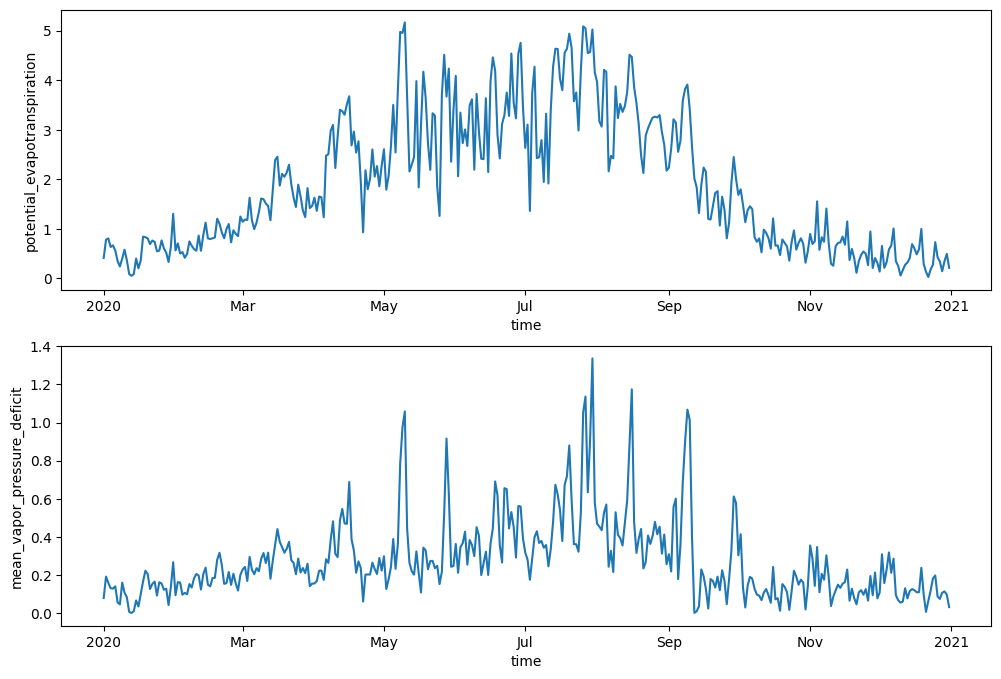

In [13]:
fig, axes = plt.subplots(2, 1, figsize=(12, 8))

# TODO: Your code here
spatial_mean_ds['potential_evapotranspiration'].plot(ax=axes[0])
spatial_mean_ds['mean_vapor_pressure_deficit'].plot(ax=axes[1])
#they seem correlated, but would be interesting to look at them on a 1:1 graph

# Step 11:
For a better look at whether they're correlated,
make a scatter plot with the `spatial_mean_ds.plot.scatter`
function. Note this works very similarly to the pandas
version so use that background to get started.


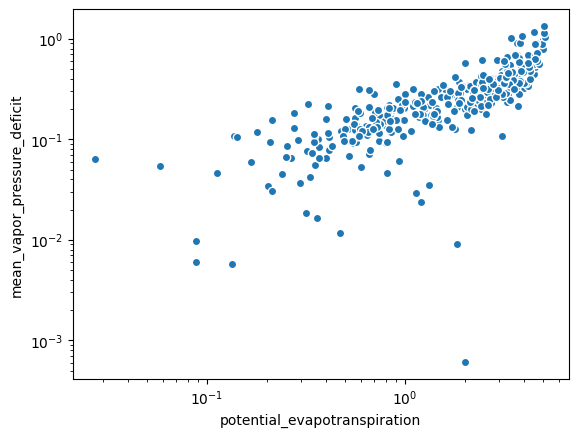

In [ ]:
# TODO: Your code here
spatial_mean_ds.plot.scatter(x='potential_evapotranspiration', y='mean_vapor_pressure_deficit')  
plt.xscale('log')
plt.yscale('log')

# Step 12:
We can actually use numpy functions directly here
to actually quantify this now. Use the `np.corrcoef`
function to calculate the correlation matrix between
the potential ET and vapor pressure deficit.


In [18]:
# TODO: Your code here
pet = spatial_mean_ds['potential_evapotranspiration']
vpd = spatial_mean_ds['mean_vapor_pressure_deficit']
np.corrcoef(pet, vpd)

array([[1.        , 0.82341655],
       [0.82341655, 1.        ]])

# Step 13:
We can do one better here actually, but to save 
some time on computation let's first "coarsen"
the total dataset. To do this, you will have to
specify a dictionary which maps between a dimension
and the number of cells along that dimension you want
to group together. Basically, we're just trying to
resample this data to be a lower spatial resolution.
For this exercise coarsen both the 'lat' and 'lon'
dimensions by 4

Note that the call to `coarsen` has a keyword,
`boundary='trim'`. This is because the domain is not
perfectly divisible by 4, so we just throw away any
extra grid cells.


In [21]:
#TODO: Your code here
coarse_amount = 4

coarse_ds = ds.coarsen(lat=coarse_amount,lon=coarse_amount,
    boundary='trim'
).mean()
coarse_ds


<xarray.Dataset> Size: 444MB
Dimensions:                                    (day: 366, lat: 146, lon: 346)
Coordinates:
  * lon                                        (lon) float64 3kB -124.7 ... -...
  * lat                                        (lat) float64 1kB 49.34 ... 25.17
  * day                                        (day) datetime64[ns] 3kB 2020-...
Data variables:
    potential_evapotranspiration               (day, lat, lon) float64 148MB dask.array<chunksize=(61, 24, 57), meta=np.ndarray>
    surface_downwelling_shortwave_flux_in_air  (day, lat, lon) float64 148MB dask.array<chunksize=(61, 24, 57), meta=np.ndarray>
    mean_vapor_pressure_deficit                (day, lat, lon) float64 148MB dask.array<chunksize=(61, 24, 57), meta=np.ndarray>
Attributes: (12/19)
    geospatial_bounds_crs:      EPSG:4326
    Conventions:                CF-1.6
    geospatial_bounds:          POLYGON((-124.7666666333333 49.40000000000000...
    geospatial_lat_min:         25.066666666666666
    geospatial_lat_max:         49.40000000000000
    geospatial_lon_min:         -124.7666666333333
    ...                         ...
    date:                       04 May 2021
    note1:                      The projection information for this file is: ...
    note2:                      Citation: Abatzoglou, J.T., 2013, Development...
    note3:                      Data in slices after last_permanent_slice (1-...
    note4:                      Data in slices after last_provisional_slice (...
    note5:                      Days correspond approximately to calendar day...

# Step 14:
Now with the coarsened dataset let's use the
`xr.corr` function to correlate the same variables
over the "day", "dimension". 


In [22]:
# TODO: Your code here
correlation = xr.corr(coarse_ds['potential_evapotranspiration'], coarse_ds['mean_vapor_pressure_deficit'], dim='day')   
correlation

<xarray.DataArray (lat: 146, lon: 346)> Size: 404kB
dask.array<truediv, shape=(146, 346), dtype=float64, chunksize=(24, 57), chunktype=numpy.ndarray>
Coordinates:
  * lon      (lon) float64 3kB -124.7 -124.5 -124.4 ... -67.54 -67.37 -67.2
  * lat      (lat) float64 1kB 49.34 49.17 49.0 48.84 ... 25.67 25.5 25.34 25.17

# Step 15:
Now plot this. Note that this step will take 
some time. This is because xarray is "lazy"
in that it never actually computed the correlation
until it was needed. This can be confusing at first,
but has some very powerful implications for filtering
and processing data in parallel. We won't be getting
very into this for the course, but you can read more
here: 
https://xarray.pydata.org/en/v2022.11.0/user-guide/dask.html

Anyhow, this should compute relatively quickly. Where
do these variables tend to be decoupled?


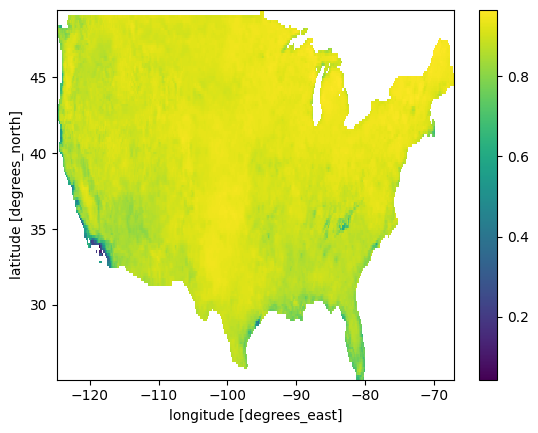

In [ ]:
# TODO: Your code here
correlation.plot()
#seem to be most decoupled along the coasts, particularly the coast of CA; VPD is lower in these areas, lower solar radiation, so low ET?
#also seems to be decoupled in the desert (near Mexicali) - high VPD but low PET due to water limited environment

In [ ]:


# %%
# Congratulations that's it for this assignment!
# Go ahead and submit your completed script to 
# GitHub. For the second part of